# STA130 Homework Week789 Pre-Lecture(s)
ChatGPT Log: https://chatgpt.com/share/672d8449-e768-8002-b1a3-06c62897c426

1) The Simple Linear Regression Model is basically just a method to determine the relationship between two variables, where one is the independent variable (which is labelled as x), and the other is the dependent variable, which labelled as y. The dependent variable is basically what you want to predict, for example in the case of house prices, you can mark that as the dependent variable (y), which can be represented on the horizontal axis. You can then set the independent variable as something like the neighbourhood quality (x), where the neighbourhood quality could be a range from 1 to 100, and you can see how the house prices rise or drop depending on the neighbourhood quality. β represents the intercept where x = 0. β1 is the slope, basically how much the average y changes every time x changes by one. Epsilon represents the error term which is the difference between the line and the actual values.

The equation for a simple linear regression model is represented with Y (outcome) = intercept + slope*(variable) + error

In [73]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

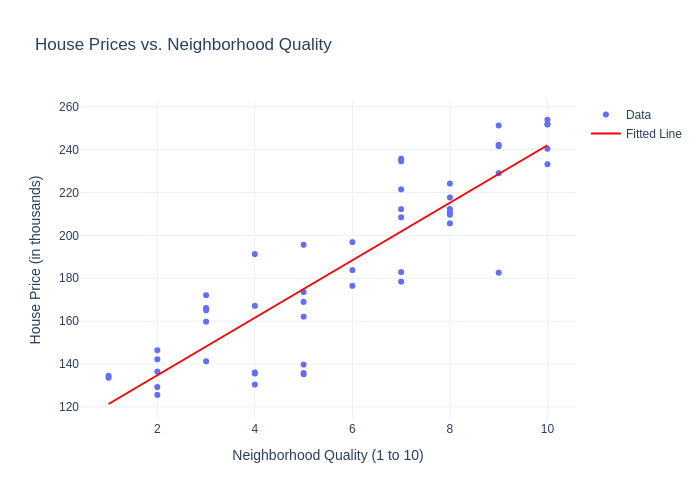

In [74]:
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

# Generating hypothetical data
np.random.seed(42)

# Independent variable: Neighborhood quality (from 1 to 10)
neighborhood_quality = np.random.randint(1, 11, 50)

# Dependent variable: House prices (in thousands), influenced by neighborhood quality
house_prices = 100 + neighborhood_quality * 15 + np.random.normal(0, 20, 50)  # Base price + quality * coefficient + noise

# Fit a simple linear regression model
model = LinearRegression()
model.fit(neighborhood_quality.reshape(-1, 1), house_prices)

# Get the fitted line
predicted_prices = model.predict(neighborhood_quality.reshape(-1, 1))

# Plot the data and the fitted line
fig = go.Figure()

# Scatter plot for data
fig.add_trace(go.Scatter(x=neighborhood_quality, y=house_prices, mode='markers', name='Data'))

# Fitted line
fig.add_trace(go.Scatter(x=neighborhood_quality, y=predicted_prices, mode='lines', name='Fitted Line', line=dict(color='red')))

fig.update_layout(title='House Prices vs. Neighborhood Quality',
                  xaxis_title='Neighborhood Quality (1 to 10)',
                  yaxis_title='House Price (in thousands)',
                  template='plotly_white')

fig.show(renderer='png')


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     173.6
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           1.47e-17
Time:                        04:22:51   Log-Likelihood:                -217.73
No. Observations:                  50   AIC:                             439.5
Df Residuals:                      48   BIC:                             443.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    107.9602      6.535     16.520      0.0

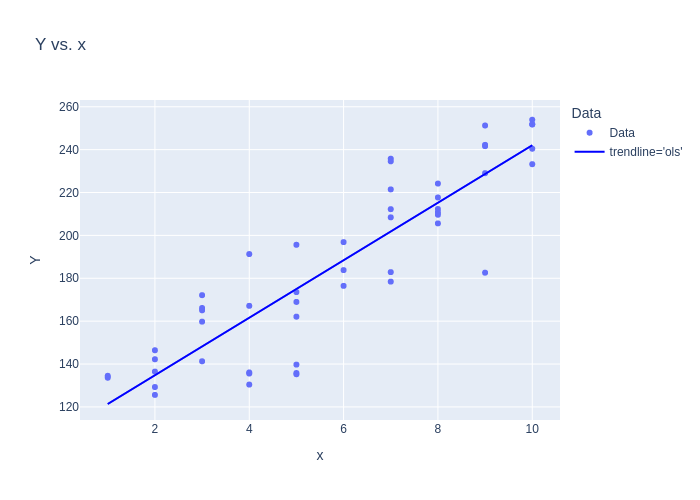

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    107.9602      6.535     16.520      0.000      94.820     121.100
x             13.4078      1.018     13.175      0.000      11.362      15.454
Intercept    107.960197
x             13.407836
dtype: float64
[107.96019712  13.40783583]
0.7833778994029734


In [75]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf  # for defining and fitting OLS models
import plotly.express as px  # for plotting

# Generating hypothetical data
np.random.seed(42)

# Independent variable: Neighborhood quality (from 1 to 10)
x = np.random.randint(1, 11, 50)

# Dependent variable: House prices (in thousands), influenced by neighborhood quality
Y = 100 + x * 15 + np.random.normal(0, 20, 50)  # Base price + quality * coefficient + noise

# Combine the x and Y into a pandas DataFrame
df = pd.DataFrame({'x': x, 'Y': Y})

# Fit the model using statsmodels
model_data_specification = smf.ols("Y~x", data=df)  # Specifying the model
fitted_model = model_data_specification.fit()  # Fit the model to the data

# Display the summary of the fitted model
print(fitted_model.summary())

# Plot the data and the fitted line
df['Data'] = 'Data'  # Hack to add data to legend
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')

# Adding the fitted regression line manually (optional, shows what trendline='ols' does)
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

# Show the plot
fig.show(renderer='png')

# You can also access individual components from the fitted model for further analysis:
print(fitted_model.summary().tables[1])  # Table with coefficients and stats
print(fitted_model.params)  # Coefficients
print(fitted_model.params.values)  # Coefficients as numpy array
print(fitted_model.rsquared)  # R-squared value


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     173.6
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           1.47e-17
Time:                        04:22:51   Log-Likelihood:                -217.73
No. Observations:                  50   AIC:                             439.5
Df Residuals:                      48   BIC:                             443.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    107.9602      6.535     16.520      0.0

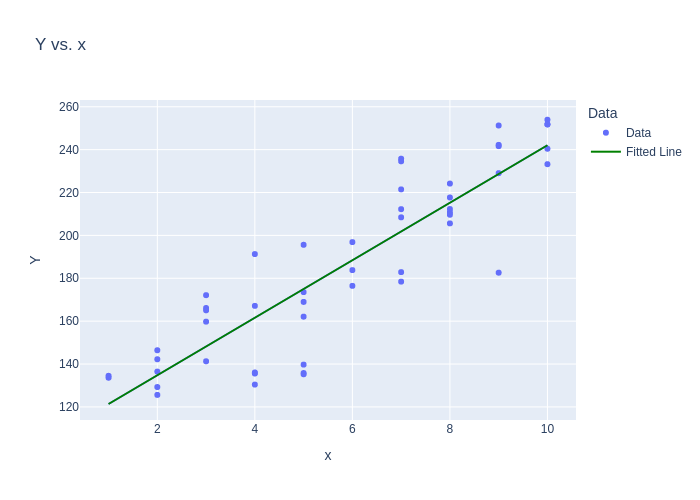

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    107.9602      6.535     16.520      0.000      94.820     121.100
x             13.4078      1.018     13.175      0.000      11.362      15.454
Intercept    107.960197
x             13.407836
dtype: float64
[107.96019712  13.40783583]
0.7833778994029734


In [76]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf  # for defining and fitting OLS models
import plotly.express as px  # for plotting

# Generating hypothetical data
np.random.seed(42)

# Independent variable: Neighborhood quality (from 1 to 10)
x = np.random.randint(1, 11, 50)

# Dependent variable: House prices (in thousands), influenced by neighborhood quality
Y = 100 + x * 15 + np.random.normal(0, 20, 50)  # Base price + quality * coefficient + noise

# Combine the x and Y into a pandas DataFrame
df = pd.DataFrame({'x': x, 'Y': Y})

# Fit the model using statsmodels
model_data_specification = smf.ols("Y~x", data=df)  # Specifying the model
fitted_model = model_data_specification.fit()  # Fit the model to the data

# Display the summary of the fitted model
print(fitted_model.summary())

# Plot the data and the fitted line
df['Data'] = 'Data'  # Hack to add data to legend
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')

# Adding the fitted regression line manually (using fitted values)
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='green'), name="Fitted Line")

# Show the plot
fig.show(renderer='png')

# You can also access individual components from the fitted model for further analysis:
print(fitted_model.summary().tables[1])  # Table with coefficients and stats
print(fitted_model.params)  # Coefficients
print(fitted_model.params.values)  # Coefficients as numpy array
print(fitted_model.rsquared)  # R-squared value


#3) In the figure above, the trendline from figure 1 was added to the data of question 2. In figure 1 it was randomly generated based on a normal curve. The trend line was then fitted to the data. In the first piece of code,  simulation of random sampling variation is used to randomly create a bit of code with artificially altered data to mimic what it might be more akin to in real life. In the second piece of code, everything is very mathematical and calculated precisely based off of the fitted line. In the second piece of code, the data is fitted to the line, whereas in the first, the line is fitted to the data.

#4) fitted_model.summary().tables[1] is effectively a summary of all the data used to calculate fitted_model.fittedvalues. It would include things such as the intercept (stated before as beta naught), and the x (the dependent variable). These values are then used in a fitted linear regression model equation to calculate predicted values of how Y will behave as X changes. As stated above, and in summary, fitted values are derived using the estimated/fitted linear regression model equation. I would love to type out that equation, however I don't think I can use LaTex here.

#5) In ChatGPT's explanation, they state:
The fitted line in an OLS regression is the line that minimizes the sum of squared residuals between the observed data points and the predicted values.
The line is determined by two parameters, intercept and slope.
These parameters are calculated using formulas that optimize the fit to the data, resulting in the line that best represents the relationship between the independent and dependent variables.

In simpler terms and/or my own words, OLS is basically just a way to make the distance between all of the points the smallest. It will use an equation very similar to the true simple linear regression model to calculate slope and intercept, and subsequently find a theoretical line with the least distance between all of the points. ChatGPT describes this as the "sum of squared residuals", but in simpler terms at least how I interpret it, that just means that the distance between every single point and the line at its closest point is the lowest it can be.

#6) The first expression of 1-((Y-fitted_model.fittedvalues)\*\*2).sum()/((Y-Y.mean())\*\*2).sum() is very similar to basically adding up the square of the distance between the observed values and the fitted values. In the numerator, you are subtracting the predicted values, and in the denominator, you are subtracting the actual observed mean values. Squaring ensures that it is a positive number and therefore just the distance. When finally calculated out, you are left with the proportion of the total varation in Y that can be explained by the model. In the case of a number like R^2 being 0.85, that means that 85% of the variation can be explained by the equation and 15% is just due to external factors like the noise and random normal curve.

The second expression is just computing the equation above.

The third expression squares the correlation coefficient (a number which measures the strength and direction of the linear relationship between the observed and predicted values). A high correlation coefficient would imply that the theoretical and observed data are in fact correlated. On the opposite case, it could not be correlated and instead be a coincidence. When squared, it gives the variance which can be explained by the model, similarly to the second expression.

The fourth expression calculates the correlation coefficient and squares it between variable x and the variable Y, as opposed to Y vs other Y. This is basically stating how strong the linear relationship is, and the higher the number is, the more likely it is that there is a linear relationship between x and Y.

#7) A linear regression equation assumes that there is a linear relationship between x and y, as well as that the errors are independent (ie. there is not error that is likely to affect everyone, etc). It also assumes that the residuals are normally distributed and that the residuals are pretty standardly distributed across all levels of the variables.

In the dataset below, the relationship is mostly linear but at higher fertilizer levels there is a lot of curvature. Furthermore, there appears to be a bit of a skew, which could affect the equation as it is no longer a normal curve. And finally, there appears to be a pattern that shows that the variance and effectiveness of fertilizer is much more randomized when there is more fertilizer. Shown below is a graph of the data.

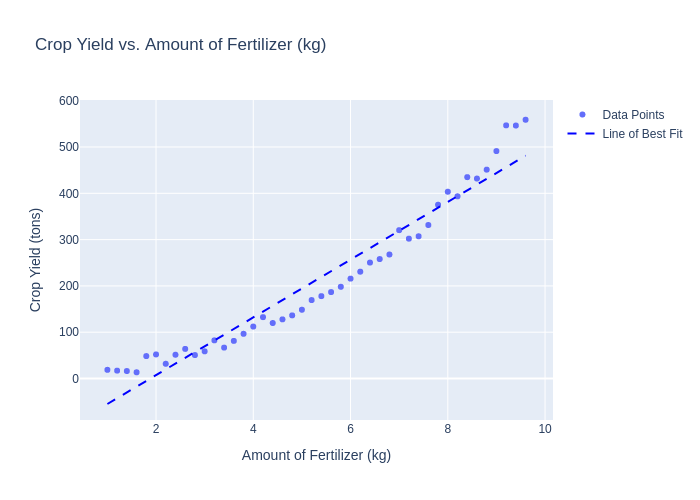

In [77]:
import pandas as pd
from scipy import stats
import plotly.graph_objects as go
import plotly.express as px

# Data: Amount of Fertilizer (kg) and Crop Yield (tons)
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])

# Define the hypothetical line of best fit (y = mx + b)
x_values = df['Amount of Fertilizer (kg) (x)']
y_values = intercept + slope * x_values

# Create the scatter plot of data points and the line of best fit
fig = go.Figure()

# Add scatter plot of data points
fig.add_trace(go.Scatter(x=df['Amount of Fertilizer (kg) (x)'], 
                         y=df['Crop Yield (tons) (Y)'], 
                         mode='markers', 
                         name='Data Points'))

# Add line of best fit
fig.add_trace(go.Scatter(x=x_values, 
                         y=y_values, 
                         mode='lines', 
                         name='Line of Best Fit',
                         line=dict(color='blue', dash='dash')))

# Add titles and labels
fig.update_layout(title='Crop Yield vs. Amount of Fertilizer (kg)',
                  xaxis_title='Amount of Fertilizer (kg)',
                  yaxis_title='Crop Yield (tons)',
                  showlegend=True)

fig.show(renderer='png')


## ChatGPT Summary

In this conversation, we explored various aspects of simple linear regression (SLR) using a hypothetical dataset that shows the relationship between the amount of fertilizer used and crop yield. We began by discussing the core assumptions of SLR, such as linearity, independence, homoscedasticity, and normality of residuals, and applied these assumptions to the dataset. We identified potential issues, such as the possibility of a non-linear relationship and potential heteroscedasticity. We then used Plotly to create a scatter plot of the data and a hypothetical line of best fit based on linear regression, illustrating the relationship between the independent variable (fertilizer) and the dependent variable (crop yield). We also discussed how the line of best fit is derived using Ordinary Least Squares (OLS) and how residuals are calculated. Finally, we delved deeper into how the fitted values of the regression model are determined using OLS, clarifying that the fitted line minimizes the sum of squared residuals to achieve the best fit for the data.

# Post Lecture Homework

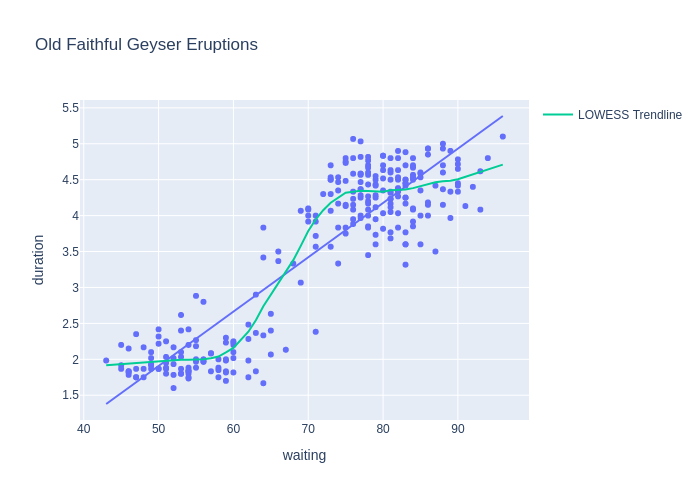

In [78]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [79]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        04:22:53   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#8) We are trying to determine the effect of the waiting time between eruptions and the duration of the eruption. A null hypothesis in this case would imply that there is no correlation between the waiting time and the duration. An alternative hypothesis in this case would suggest that there is a direct correlation.

In the case of this data set, the p value is shown to be 0.000. This suggests that there is likely no correlation, however, as there is no way to prove the null hypothesis true or false, we simply reject it as it is unlikely to be the case in this specific dataset. We reject the null hypothesis, suggesting that there is likely a direct correlation between the waiting time and the duration of the eruption.

Furthermore, the F statistic in this case can show that about 81.3% of the variance can be explained by there being a correlation.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


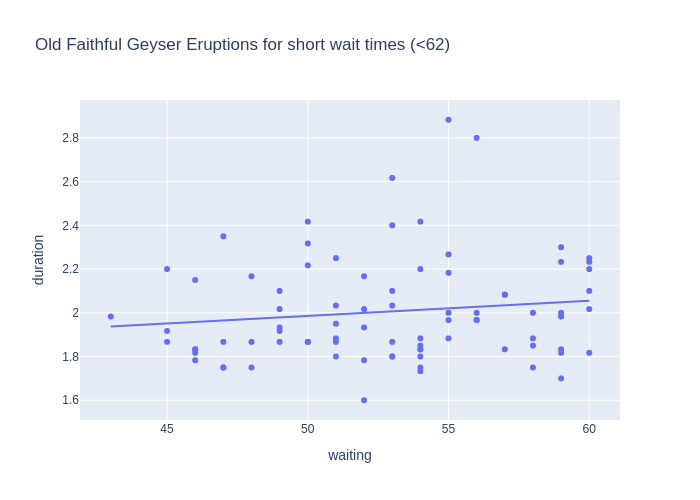

In [80]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [81]:
short_wait_limit = 62
short_wait = old_faithful.waiting < short_wait_limit
print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


#9) Unlike the data involving both short wait and long waits between geyser eruptions, this data only accounts for short waits below 63 minutes. The code directly above shows that the p value in this case increases all the way to 0.238. This suggests that there is no evidence in the data for the relationship between duration and wait time, but this is only when the wait times are short. In this case, there is very little evidence against the null hypothesis and as such, we fail to reject hte null hypothesis which means that it is still probable that there is no correlation between the eruption time and the wait time when accounting for short waits.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


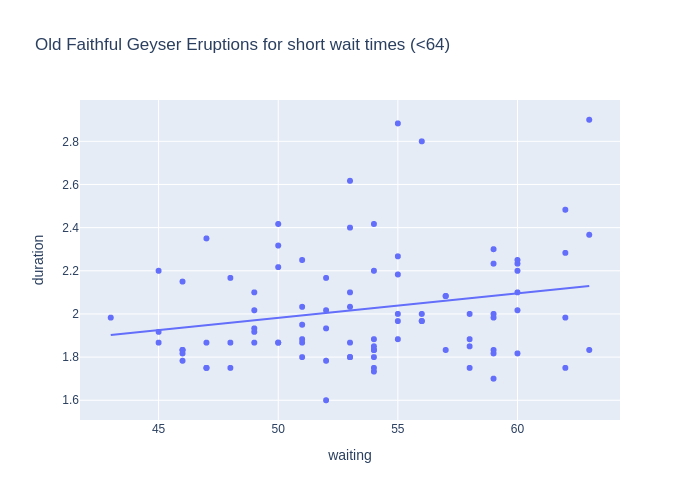

In [82]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


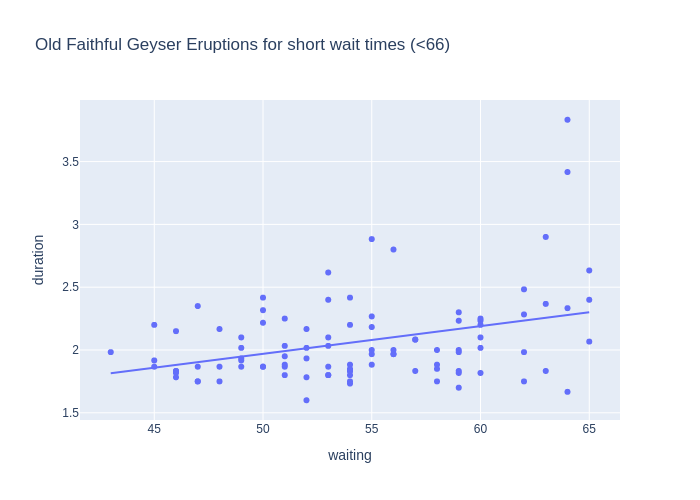

In [83]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

#9 Continued) As the cutoff for what is considered a "short wait time" is extended, we can see the p value begin to drop. At 64 minutes being the cutoff, there is a p value of 0.036, which suggests moderate evidence against the null hypothesis, giving us sufficient evidence to reject the null hypothesis suggesting that there is a possibility of a correlation between the waiting and duration variables. Upon the cutoff time being extended to 66 minutes, the p value drops to a flat 0 once again and therefore suggests that there is once again, a correlation, and as such we can reject the null hypothesis as there is very strong evidence against it.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


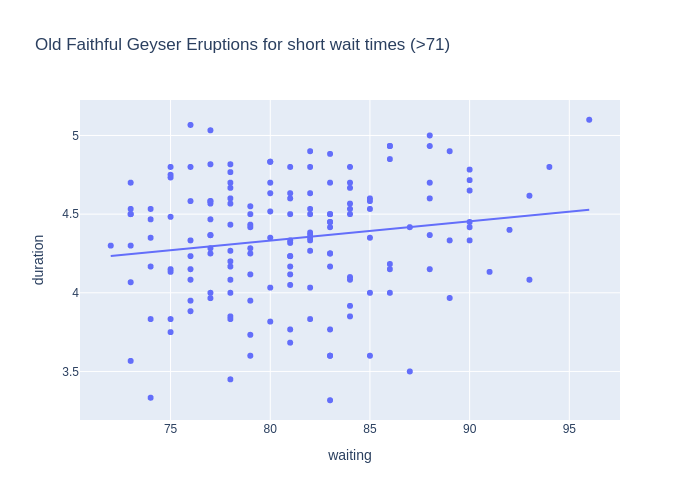

In [84]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

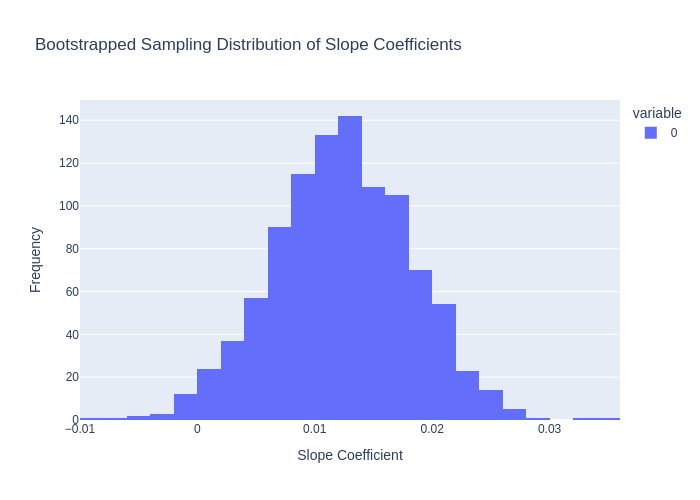

95% Bootstrapped Confidence Interval for the Slope: [0.00119448 0.02308067]


In [85]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import plotly.express as px
from scipy import stats

# Assuming old_faithful is a pandas DataFrame with 'waiting' and 'duration' columns
# Filter the dataset for long wait times
long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

# Number of bootstrap samples
n_bootstrap = 1000
bootstrapped_slope_coefficients = []

# Perform bootstrap sampling and collect slope coefficients
for _ in range(n_bootstrap):
    bootstrap_sample = old_faithful[long_wait].sample(n=len(old_faithful[long_wait]), replace=True)
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    bootstrapped_slope_coefficients.append(model.params[1])

# Convert the list to a numpy array
bootstrapped_slope_coefficients = np.array(bootstrapped_slope_coefficients)

# Visualize the bootstrapped sampling distribution of the slope coefficients
fig = px.histogram(bootstrapped_slope_coefficients, nbins=30, title='Bootstrapped Sampling Distribution of Slope Coefficients')
fig.update_layout(xaxis_title='Slope Coefficient', yaxis_title='Frequency')
fig.show(renderer='png')

# Calculate and print the 95% confidence interval
conf_interval = np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])
print(f"95% Bootstrapped Confidence Interval for the Slope: {conf_interval}")


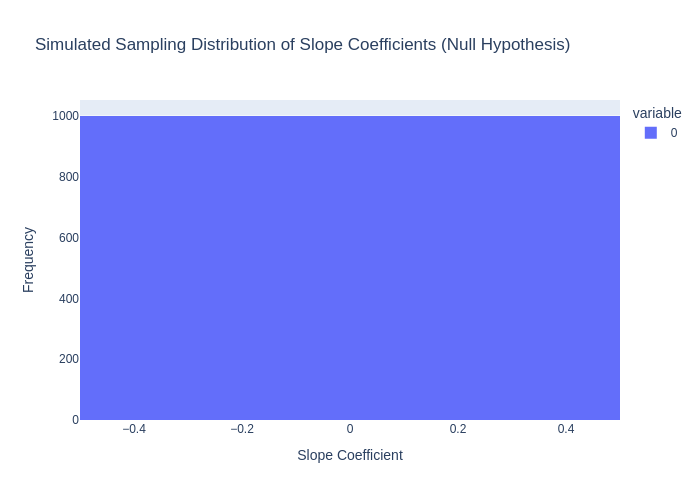

Simulated p-value for the null hypothesis: 0.0


In [86]:
# Simulate data under the null hypothesis of no linear association
old_faithful_simulation = old_faithful[long_wait].copy()
old_faithful_simulation['duration'] = 1.65 + 0 * old_faithful_simulation['waiting'] + stats.norm(loc=0, scale=0.37).rvs(size=len(old_faithful_simulation))

# Number of simulations
n_simulations = 1000
simulated_slope_coefficients = []

# Run simulations and collect slope coefficients
for _ in range(n_simulations):
    model_sim = smf.ols('duration ~ waiting', data=old_faithful_simulation).fit()
    simulated_slope_coefficients.append(model_sim.params[1])

# Convert the list to a numpy array
simulated_slope_coefficients = np.array(simulated_slope_coefficients)

# Visualize the simulated sampling distribution of the slope coefficients
fig = px.histogram(simulated_slope_coefficients, nbins=30, title='Simulated Sampling Distribution of Slope Coefficients (Null Hypothesis)')
fig.update_layout(xaxis_title='Slope Coefficient', yaxis_title='Frequency')
fig.show(renderer='png')

# Calculate the p-value for the simulated distribution
observed_slope = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().params[1]
p_value = (np.abs(simulated_slope_coefficients) >= np.abs(observed_slope)).mean()
print(f"Simulated p-value for the null hypothesis: {p_value}")


In [87]:
# Check if the observed slope is within the 95% bootstrapped confidence interval
if conf_interval[0] <= observed_slope <= conf_interval[1]:
    print("The observed slope is within the 95% bootstrapped confidence interval.")
else:
    print("The observed slope is not within the 95% bootstrapped confidence interval.")


The observed slope is within the 95% bootstrapped confidence interval.


In [88]:
# Get the p-value from the OLS summary for the long wait times data
ols_p_value = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().pvalues[1]
print(f"OLS p-value: {ols_p_value}")

# Compare the simulated p-value with the OLS p-value
if np.isclose(p_value, ols_p_value, atol=0.05):
    print("The simulated p-value matches the OLS p-value.")
else:
    print("The simulated p-value does not match the OLS p-value.")


OLS p-value: 0.038135755338567744
The simulated p-value matches the OLS p-value.


#10) I fed question 10 into ChatGPT for the code. This was fed into the same ChatGPT instance as used in the pre-lecutre homework, and the code above is what was obtained. After obtaining a bootstrapped sampling distribution, the distributions from said bootstrapping are shown in the first figure here.

It is later found that the slope found is within the 95% bootstrapped confidence interval, and furthermore the simulated p value matches the OLS' p value. What this suggests is that the observed slope is in fact accurate, and is unlikely to be an outlier. The calculated p value can be used to compare to the OLS existing p value, and as they do, it is safe to assume that the OLS test is likely valid. The checks basically are used to validate the tested data.

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


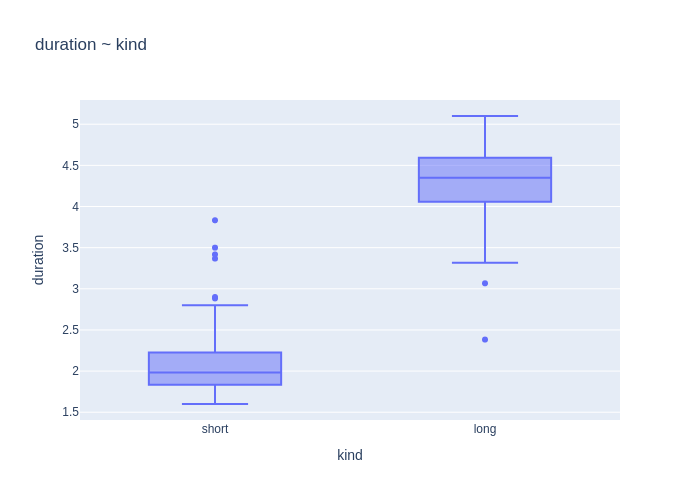

In [89]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

#11) Being completely honest, I am not entirely sure certain what this question is necessarily asking me to do in contrary to what has already been provided. However, it is shown that at least to some extent, the data has already been divided into its duration and lengths, and each variable effectively now has an additional binary statement determining if its short or long in terms of wait. Grouping everything together like this then showing it in the form of a box plot retains the same 0.00 p value, in which we can still determine that there is a correlation and as such as we can still reject the null hypothesis. The differences between the indicator based model and the standard model based on a scatter plot both suggest that the duration of the wait between eruptions is directly correlated with the duration of the eruption. The continuous model, the one based on a scatter plot with minute by minute representations, provides a detailed relationship between wait time and duration. Whereas the other one, categorizing and using indicators, shows a very clear sign of there being a difference whilst losing the detail of the previous one.

In [90]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

#12) Model 1, utilizing all of the data using the slope, will provide the best proof relating to the null hypothesis. In the case of simply looking at the short wait data, we reject the null hypothesis in many of the initial runs until we extend the duration considered short to an adequate point. In the model 3 of a long wait data, it is the opposite case of the second model, where we have to lower the duration until it shows the full picture. And for the last piece of information, despite using all of the data, it doesn't necessarily show the residuals very well and whilst coming to the correct conclusion in testing, it meets a critical flaw of there being a less normal distributed curve as all data falls within a much thinner range. The "best fit" model is typically going to be the best for the purposes of calculating the error as well as the plausibility of the null hypothesis, and as such, Model 1 is the best.

In [91]:
# Calculate observed difference in means
observed_mean_diff = old_faithful.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]

# Run permutation test
permutation_diffs = []
for _ in range(1000):  # Repeat shuffling process many times
    shuffled_df = old_faithful.assign(kind_shuffled=old_faithful['kind'].sample(frac=1).values)
    permuted_diff = shuffled_df.groupby('kind_shuffled')['duration'].mean().iloc[::-1].diff().values[1]
    permutation_diffs.append(permuted_diff)

# Calculate p-value based on observed mean difference
p_value = (np.abs(permutation_diffs) >= np.abs(observed_mean_diff)).mean()
p_value

0.0

In [92]:
# Bootstrap for difference in means
bootstrapped_diffs = []
for _ in range(1000):  # Number of bootstrap samples
    bootstrapped_df = old_faithful.groupby('kind').apply(lambda x: x.sample(n=len(x), replace=True)).reset_index(drop=True)
    bootstrapped_diff = bootstrapped_df.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]
    bootstrapped_diffs.append(bootstrapped_diff)

# 95% confidence interval for the mean difference
conf_interval = np.quantile(bootstrapped_diffs, [0.025, 0.975])
conf_interval

array([2.10488105, 2.29825549])

#13) A permutation test is completed in the first chunk of code here. within the permutation test, it randomly shuffles the labels to determine what the chance of the observed difference occurring by random chance is. This assumes that there is no correlation as that would imply that on either side (long and short delays), the data has no difference and can therefore be the same.

When compared to the indicator based model, both are mainly aimed to understand how the data behaves across different "groups", and determines if there is any difference between long and short wait times, as well as the correlation between the wait time and the overall duration. They all roughly accomplish the same thing via different methods, with the permutation test focusing on testing the null hypothesis, the bootstrap method focusing on using a confidence interval to see how potentially unlikely or likely the data can be, and the indicator variable approach basically grouping the two into separate categories to see if there is meaningful difference between the two (or potentially more) groups.

#14) Yes

Chatbot Summary: 
The chatbot URL remains the same as the one at the top of the file.

We explored how to differentiate between theoretical and fitted simple linear regression models by creating and visualizing models using both random sampling and fitted values. I explained how ordinary least squares (OLS) works to minimize the distances between data points and the regression line, specifically through the concept of "sum of squared residuals." This approach calculates the best-fit line by determining the slope and intercept that result in the smallest possible total distance between each point and the line.

We then delved into interpreting the statistical output from the summary() and fittedvalues methods in statsmodels and how they relate to OLS parameters. This included detailing how the slope and intercept in fitted_model.params generate the fitted values, providing insight into how these values are used in practice.

Next, we worked through code examples for simulating data and bootstrapping confidence intervals for simple linear regression coefficients. In particular, we reviewed how bootstrapped slope coefficients can reveal the variability of fitted slopes, helping visualize the distribution of these slopes through repeated sampling. We then discussed the assumptions underlying simple linear regression, identifying instances where these might not align with specific datasets, such as potential non-linearity in the relationship between variables.

Lastly, we compared different approaches to hypothesis testing for comparing means between groups. We examined both permutation tests (by shuffling labels) and bootstrapped confidence intervals to test the difference in means between “short” and “long” wait times. Each method provided unique insights, and we compared these to the indicator variable approach, detailing similarities and distinctions among the three techniques.

Let me know if you'd like more detail on any part of this!